In [1]:
import scanpy as sc

[Executed on 2023-09-07 10:24:23.340793]


In [2]:
import scanpy as sc
modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/modified_intersection_16_plates.h5ad")
modified

[Executed on 2023-09-07 10:40:03.984179]


AnnData object with n_obs × n_vars = 3158 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-07 10:40:20.716364]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


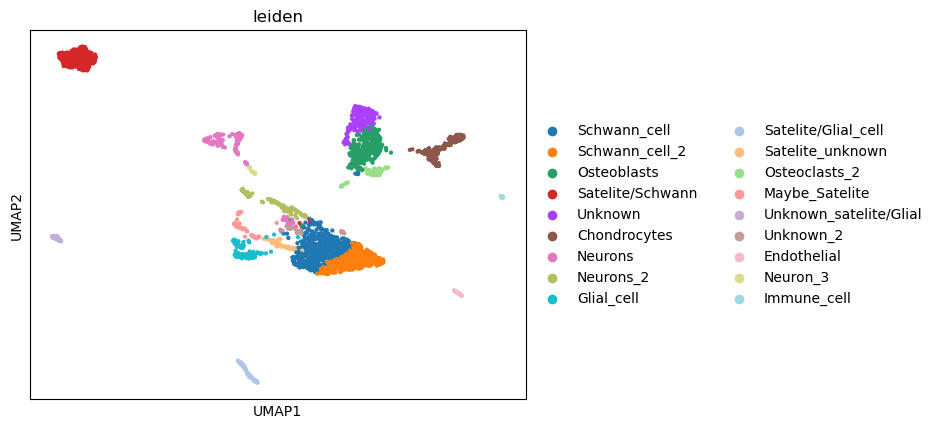

In [3]:
sc.pl.umap(modified,color='leiden')

[Executed on 2023-09-07 10:42:18.750166]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


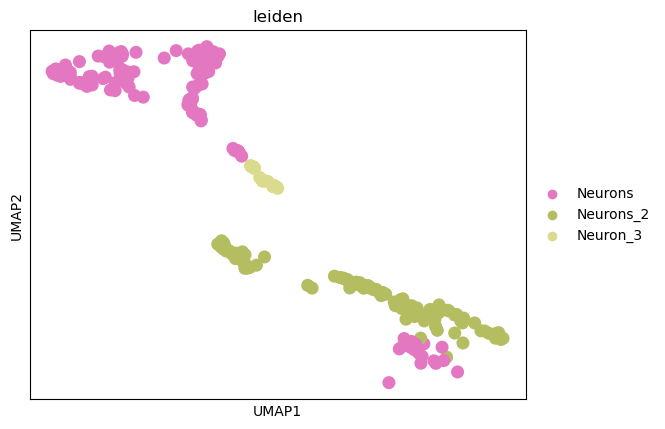

In [4]:
modified_neuron=modified[modified.obs['leiden'].isin(['Neurons','Neurons_2','Neuron_3'])]
sc.pl.umap(modified_neuron,color='leiden')

In [5]:
modified_neuron

[Executed on 2023-09-07 10:43:23.905295]


View of AnnData object with n_obs × n_vars = 341 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-07 10:45:43.499339]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


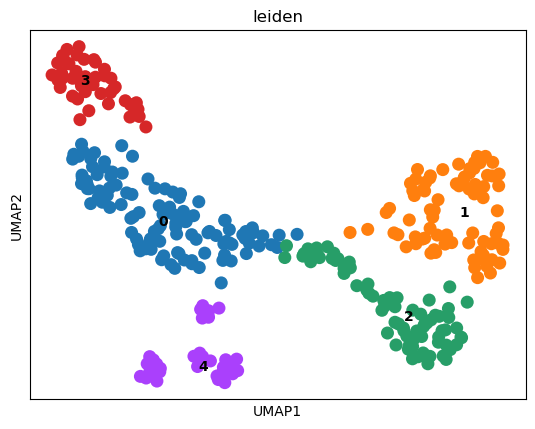

In [8]:
sc.pp.neighbors(modified_neuron, n_neighbors=30, n_pcs=15)
sc.tl.leiden(modified_neuron,resolution=0.3)
sc.tl.umap(modified_neuron,min_dist=0.5)
sc.pl.umap(modified_neuron,color='leiden',vmax='p95',layer='log1p',legend_loc='on data')

In [10]:
modified_neuron

[Executed on 2023-09-07 10:47:13.121542]


AnnData object with n_obs × n_vars = 341 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi'
    obsp: 'connectivities', 'distances'

In [19]:
del modified_neuron.uns['log1p']

[Executed on 2023-09-07 11:01:50.583886]


In [20]:
modified_neuron.X = modified_neuron.layers['umi'].copy()
sc.pp.normalize_total(modified_neuron, target_sum=None)
sc.pp.log1p(modified_neuron)
modified_neuron.layers['log1p'] = modified_neuron.X.copy()
sc.pp.scale(modified_neuron, max_value=10)
modified_neuron.layers['Scale'] = modified_neuron.X.copy()

[Executed on 2023-09-07 11:01:51.805995]


[Executed on 2023-09-07 11:01:54.380292]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


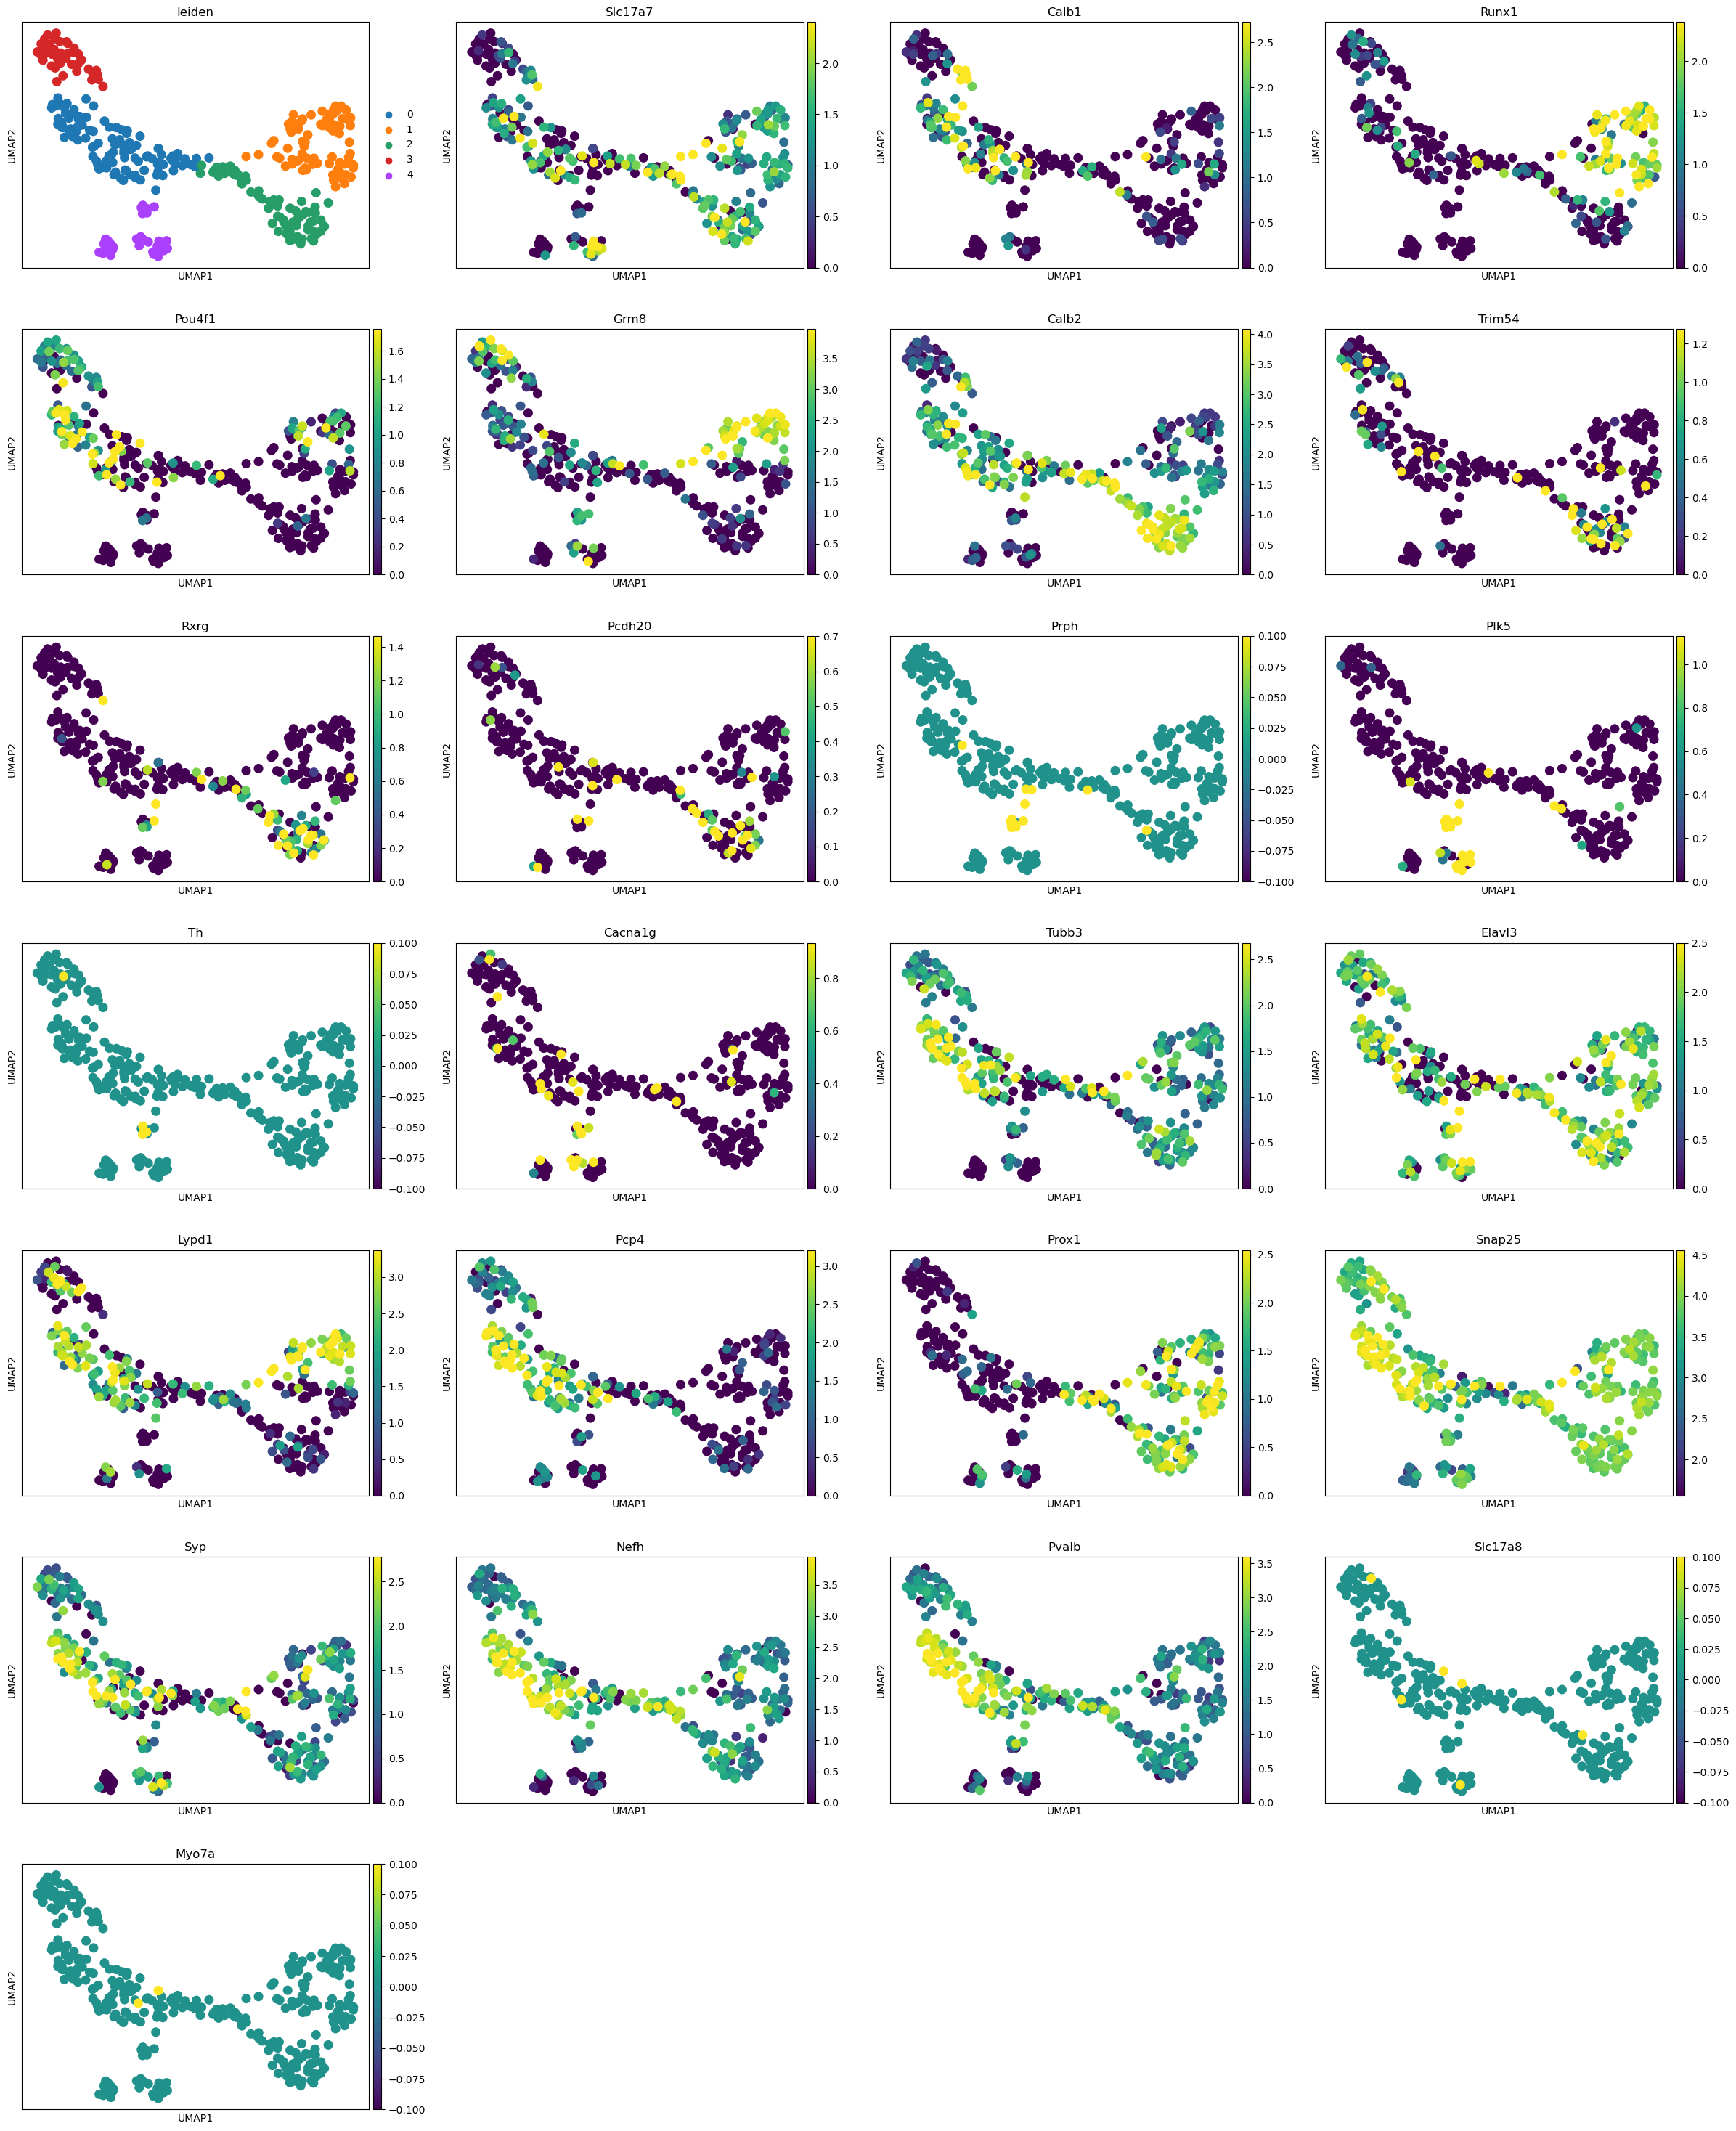

In [21]:
#From article Neuronal heterogeneity and stereotyped connectivity in the auditory afferent system 
neuron_cell_markers=['leiden','Slc17a7','Calb1','Runx1','Pou4f1','Grm8','Calb2','Trim54','Rxrg','Pcdh20','Prph','Plk5','Th','Cacna1g','Tubb3','Elavl3','Lypd1','Pcp4','Prox1','Snap25','Syp','Nefh','Pvalb','Slc17a8','Myo7a']

sc.pl.umap(modified_neuron,color=neuron_cell_markers,vmax='p95',layer='log1p')

In [22]:
modified_neuron

[Executed on 2023-09-07 11:02:10.426349]


AnnData object with n_obs × n_vars = 341 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi', 'log1p', 'Scale'
    obsp: 'connectivities', 'distances'

In [14]:
modified_neuron_no_pcp4

[Executed on 2023-09-07 10:59:27.957692]


AnnData object with n_obs × n_vars = 109 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'leiden', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'sample_ID_Plate_colors', 'umap', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi', 'log1p', 'Scale'
    obsp: 'connectivities', 'distances'

[Executed on 2023-09-07 11:01:15.092379]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


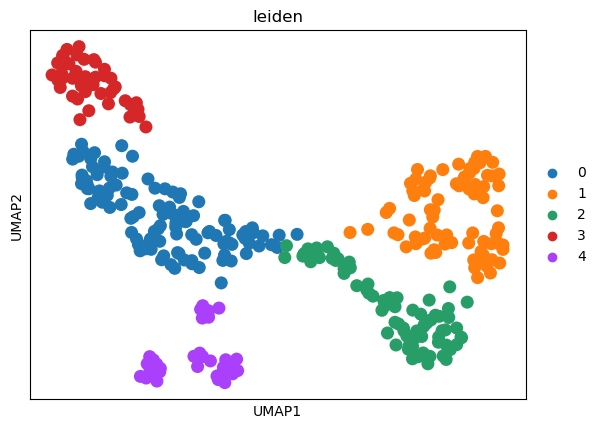

In [18]:
sc.pl.umap(modified_neuron,color='leiden',vmax='p95',layer='log1p')

[Executed on 2023-09-07 11:06:21.696056]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_utils.py:430: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + '_colors'] = colors_list
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


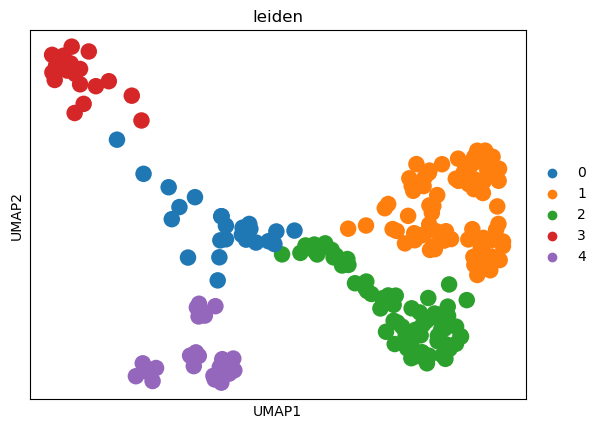

In [26]:
import scanpy as sc

Pcp4_values=modified_neuron[:, modified_neuron.var_names == 'Pcp4'].layers['log1p'].flatten()
mask=(Pcp4_values<=1.2)



# 使用mask来筛选AnnData对象
modified_neuron_no_pcp4 = modified_neuron[mask, :]

sc.pl.umap(modified_neuron_no_pcp4,color='leiden',vmax='p95',layer='log1p')


[Executed on 2023-09-07 11:06:42.275662]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


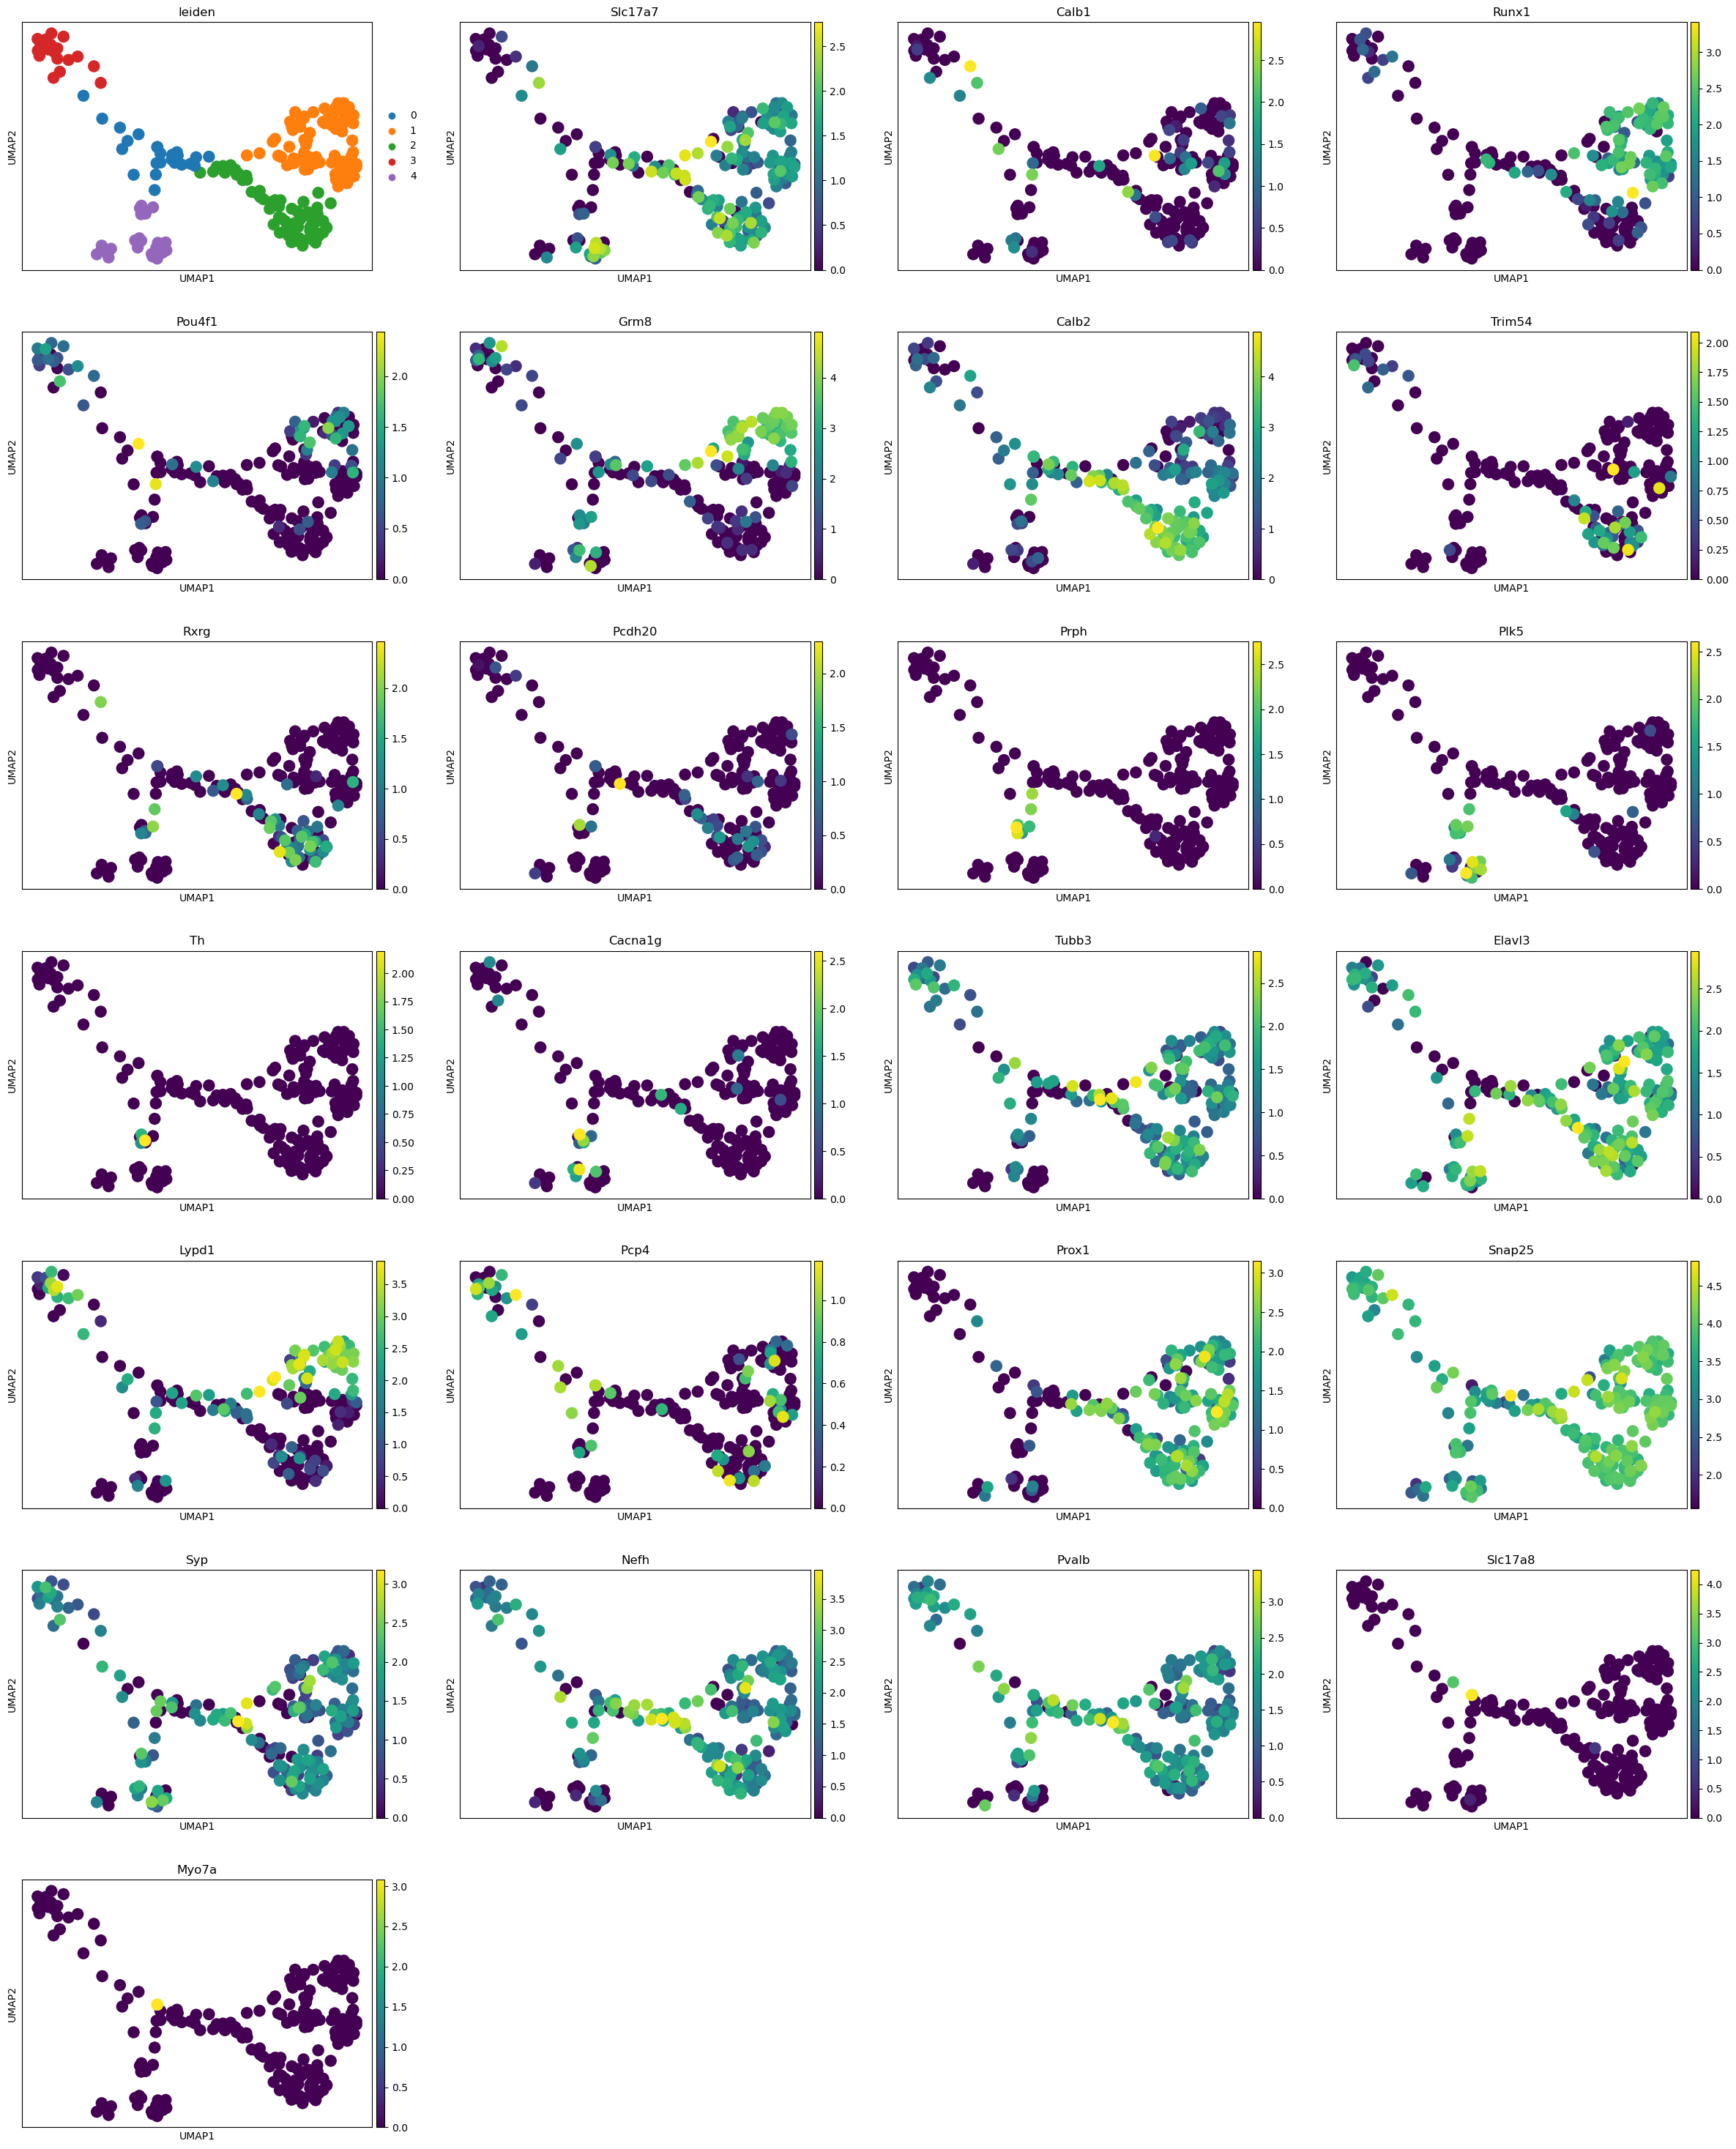

In [28]:
sc.pl.umap(modified_neuron_no_pcp4,color=neuron_cell_markers,layer='log1p')

[Executed on 2023-09-07 11:08:07.088096]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


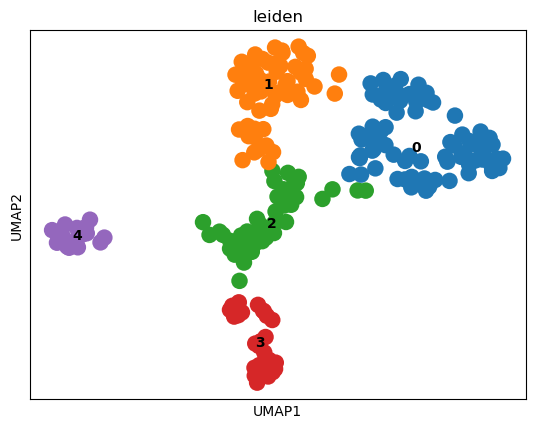

In [29]:
sc.pp.neighbors(modified_neuron_no_pcp4, n_neighbors=20, n_pcs=15)
sc.tl.leiden(modified_neuron_no_pcp4,resolution=0.3)
sc.tl.umap(modified_neuron_no_pcp4,min_dist=0.5)
sc.pl.umap(modified_neuron_no_pcp4,color='leiden',vmax='p95',layer='log1p',legend_loc='on data')

In [30]:
#From article Neuronal heterogeneity and stereotyped connectivity in the auditory afferent system 
neuron_cell_markers=['leiden','Slc17a7','Calb1','Runx1','Pou4f1','Grm8','Calb2','Trim54','Rxrg','Pcdh20','Prph','Plk5','Th','Cacna1g','Tubb3','Elavl3','Lypd1','Pcp4','Prox1','Snap25','Syp','Nefh','Pvalb','Slc17a8','Myo7a']

[Executed on 2023-09-07 11:12:04.894090]


[Executed on 2023-09-07 11:12:06.120972]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


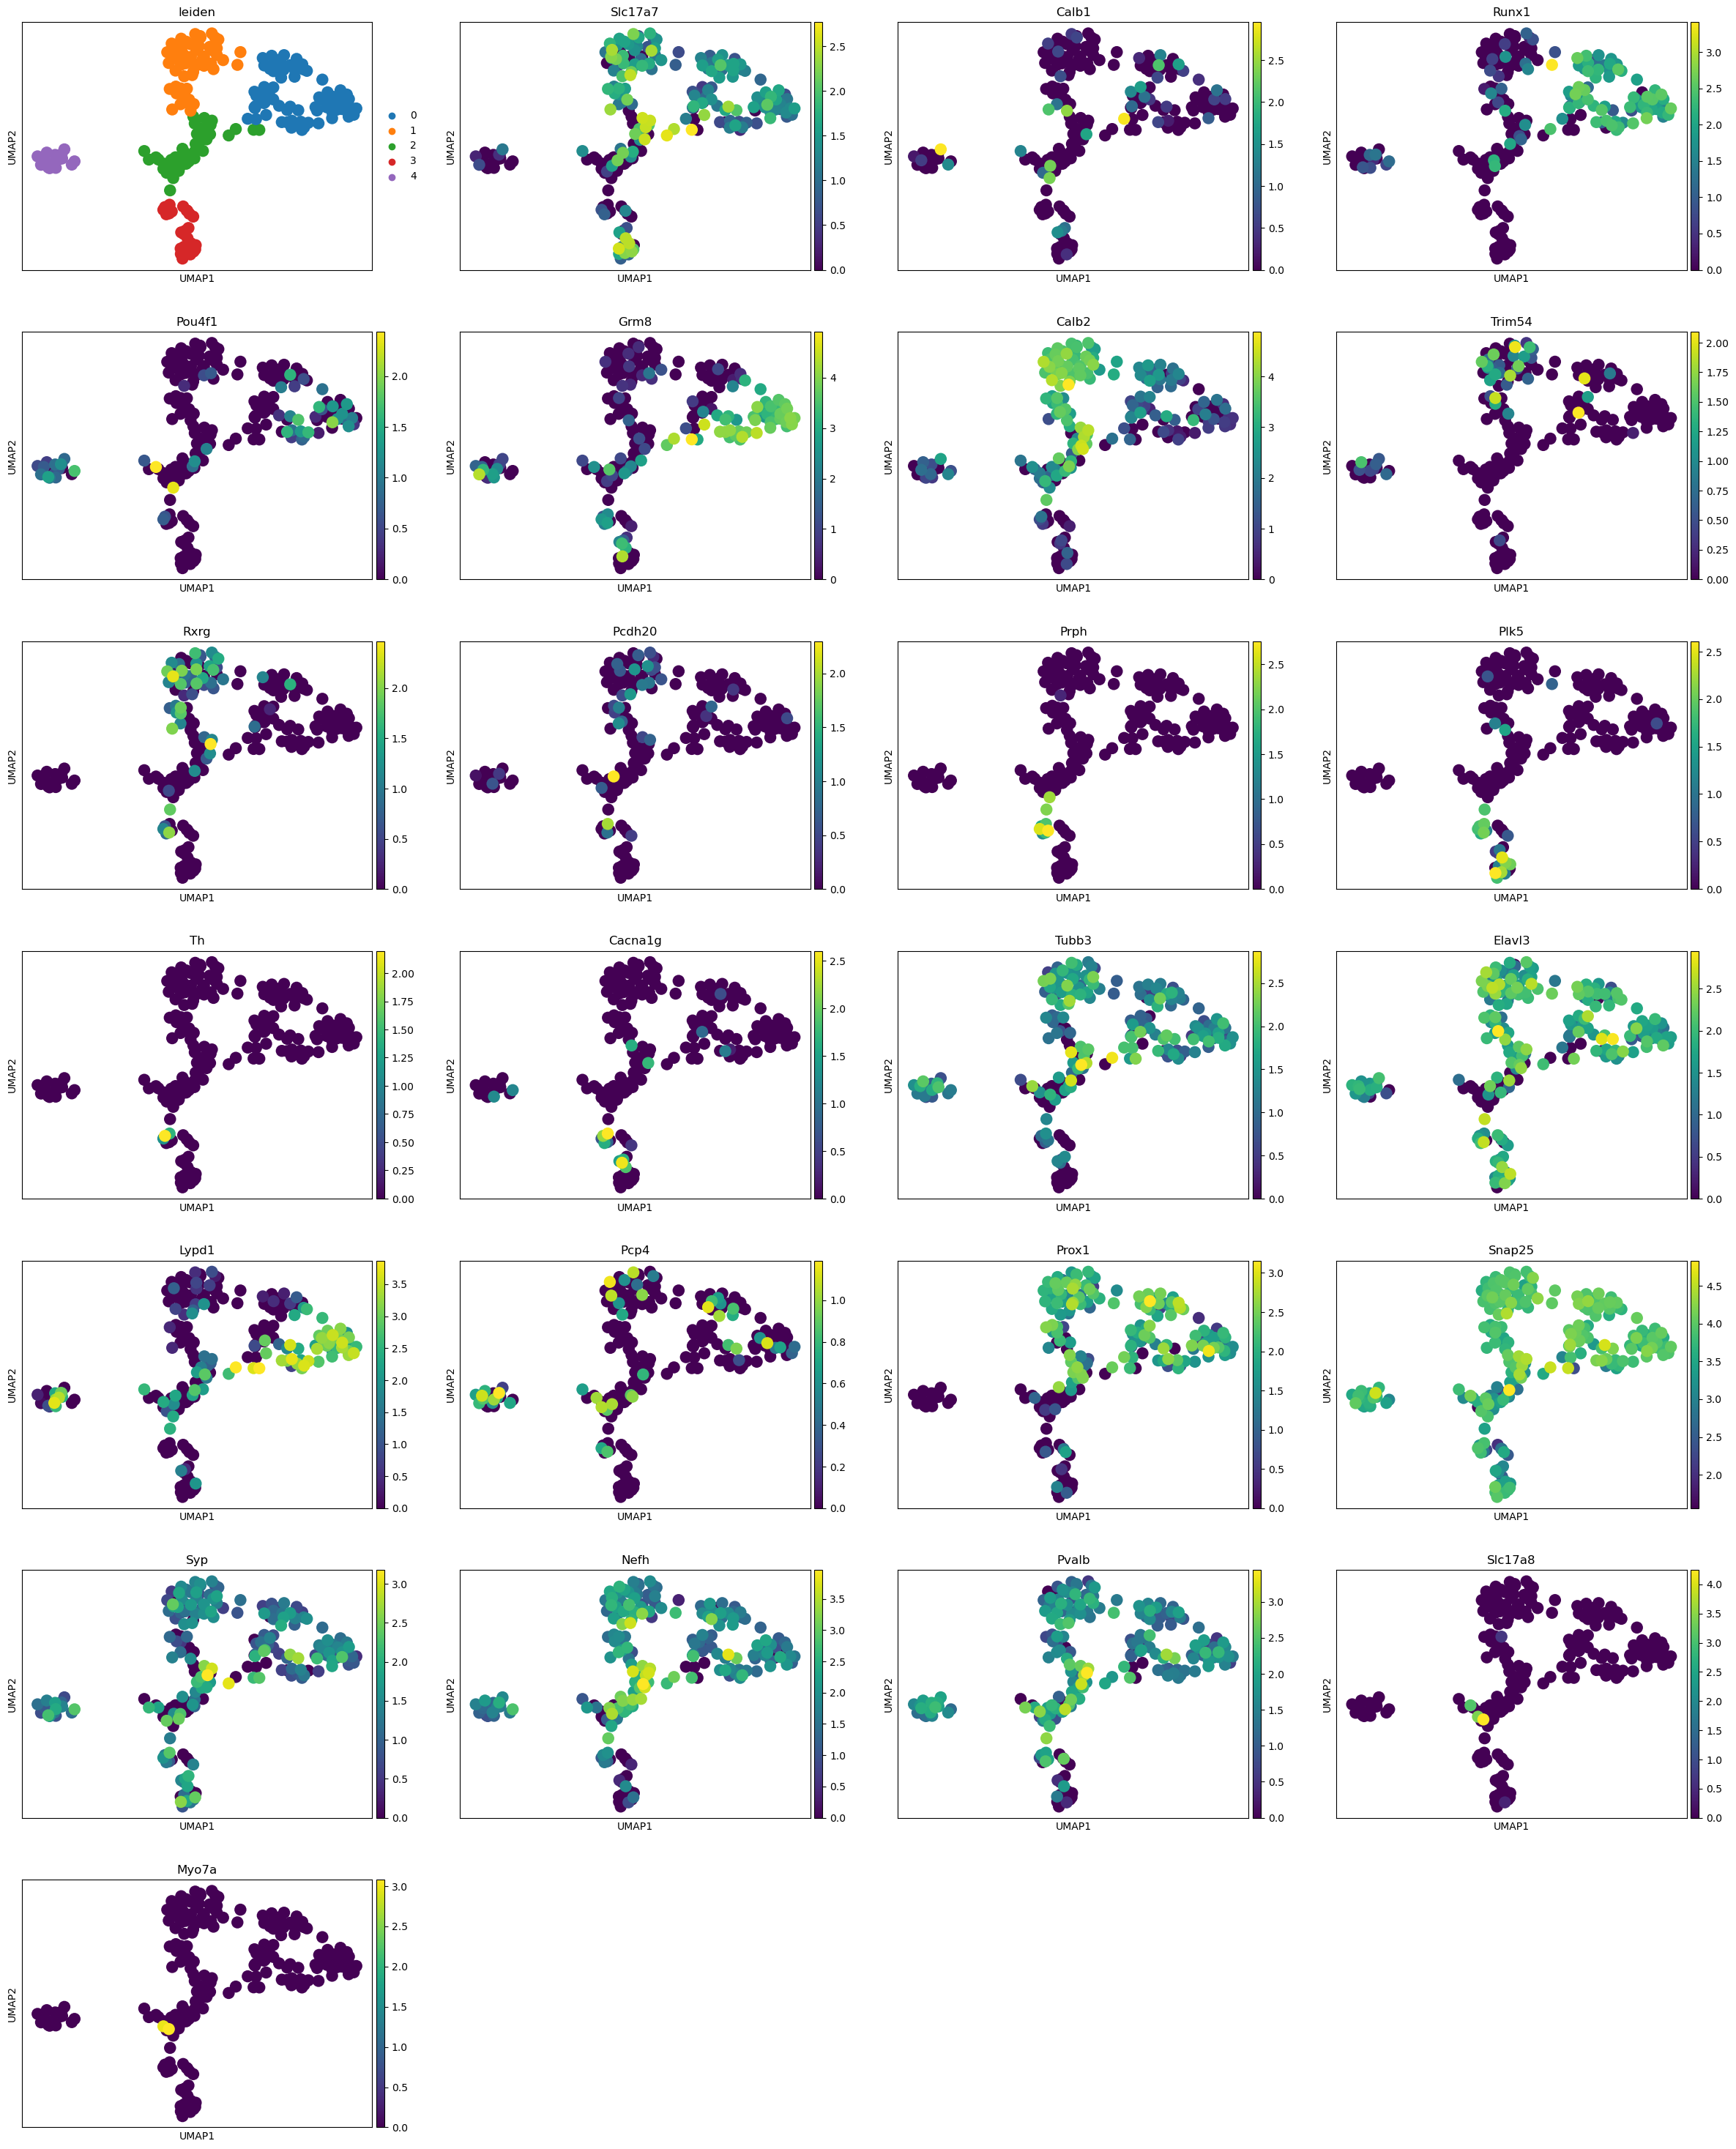

In [31]:
sc.pl.umap(modified_neuron_no_pcp4,color=neuron_cell_markers,layer='log1p')

[Executed on 2023-09-07 11:15:00.628376]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


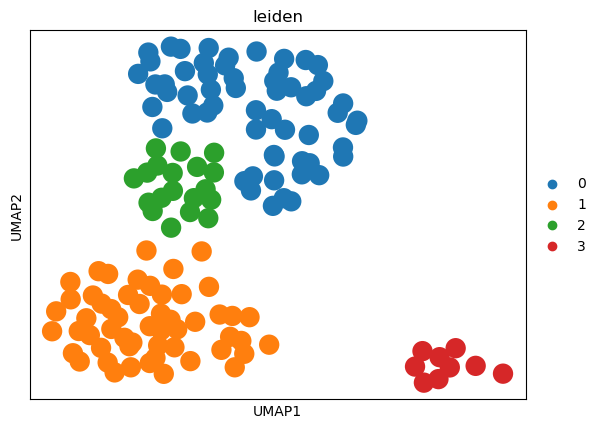

In [32]:
ad_filtered3=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/filter3butfinal.h5ad")
sc.pl.umap(ad_filtered3,color='leiden')

[Executed on 2023-09-07 11:20:41.467782]


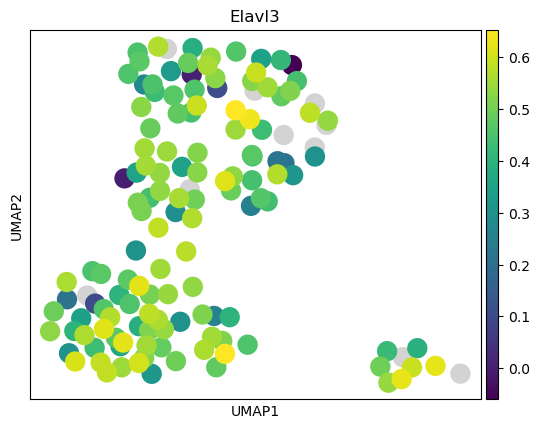

In [35]:
sc.pl.umap(ad_filtered3,color='Elavl3')

[Executed on 2023-09-07 11:22:39.967190]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


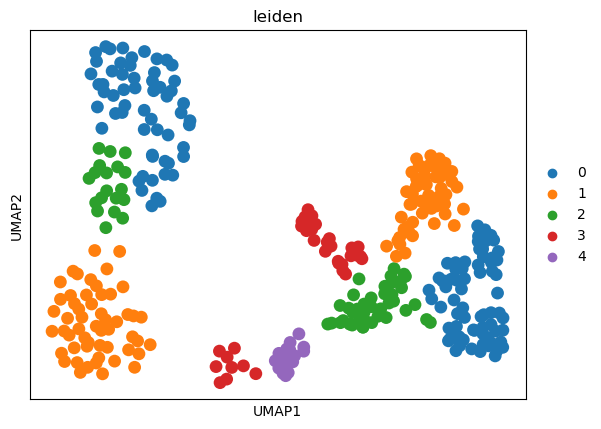

In [36]:
new_neuron=sc.concat([modified_neuron_no_pcp4,ad_filtered3],join='outer')

sc.pl.umap(new_neuron,color='leiden')

[Executed on 2023-09-07 11:22:57.454070]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


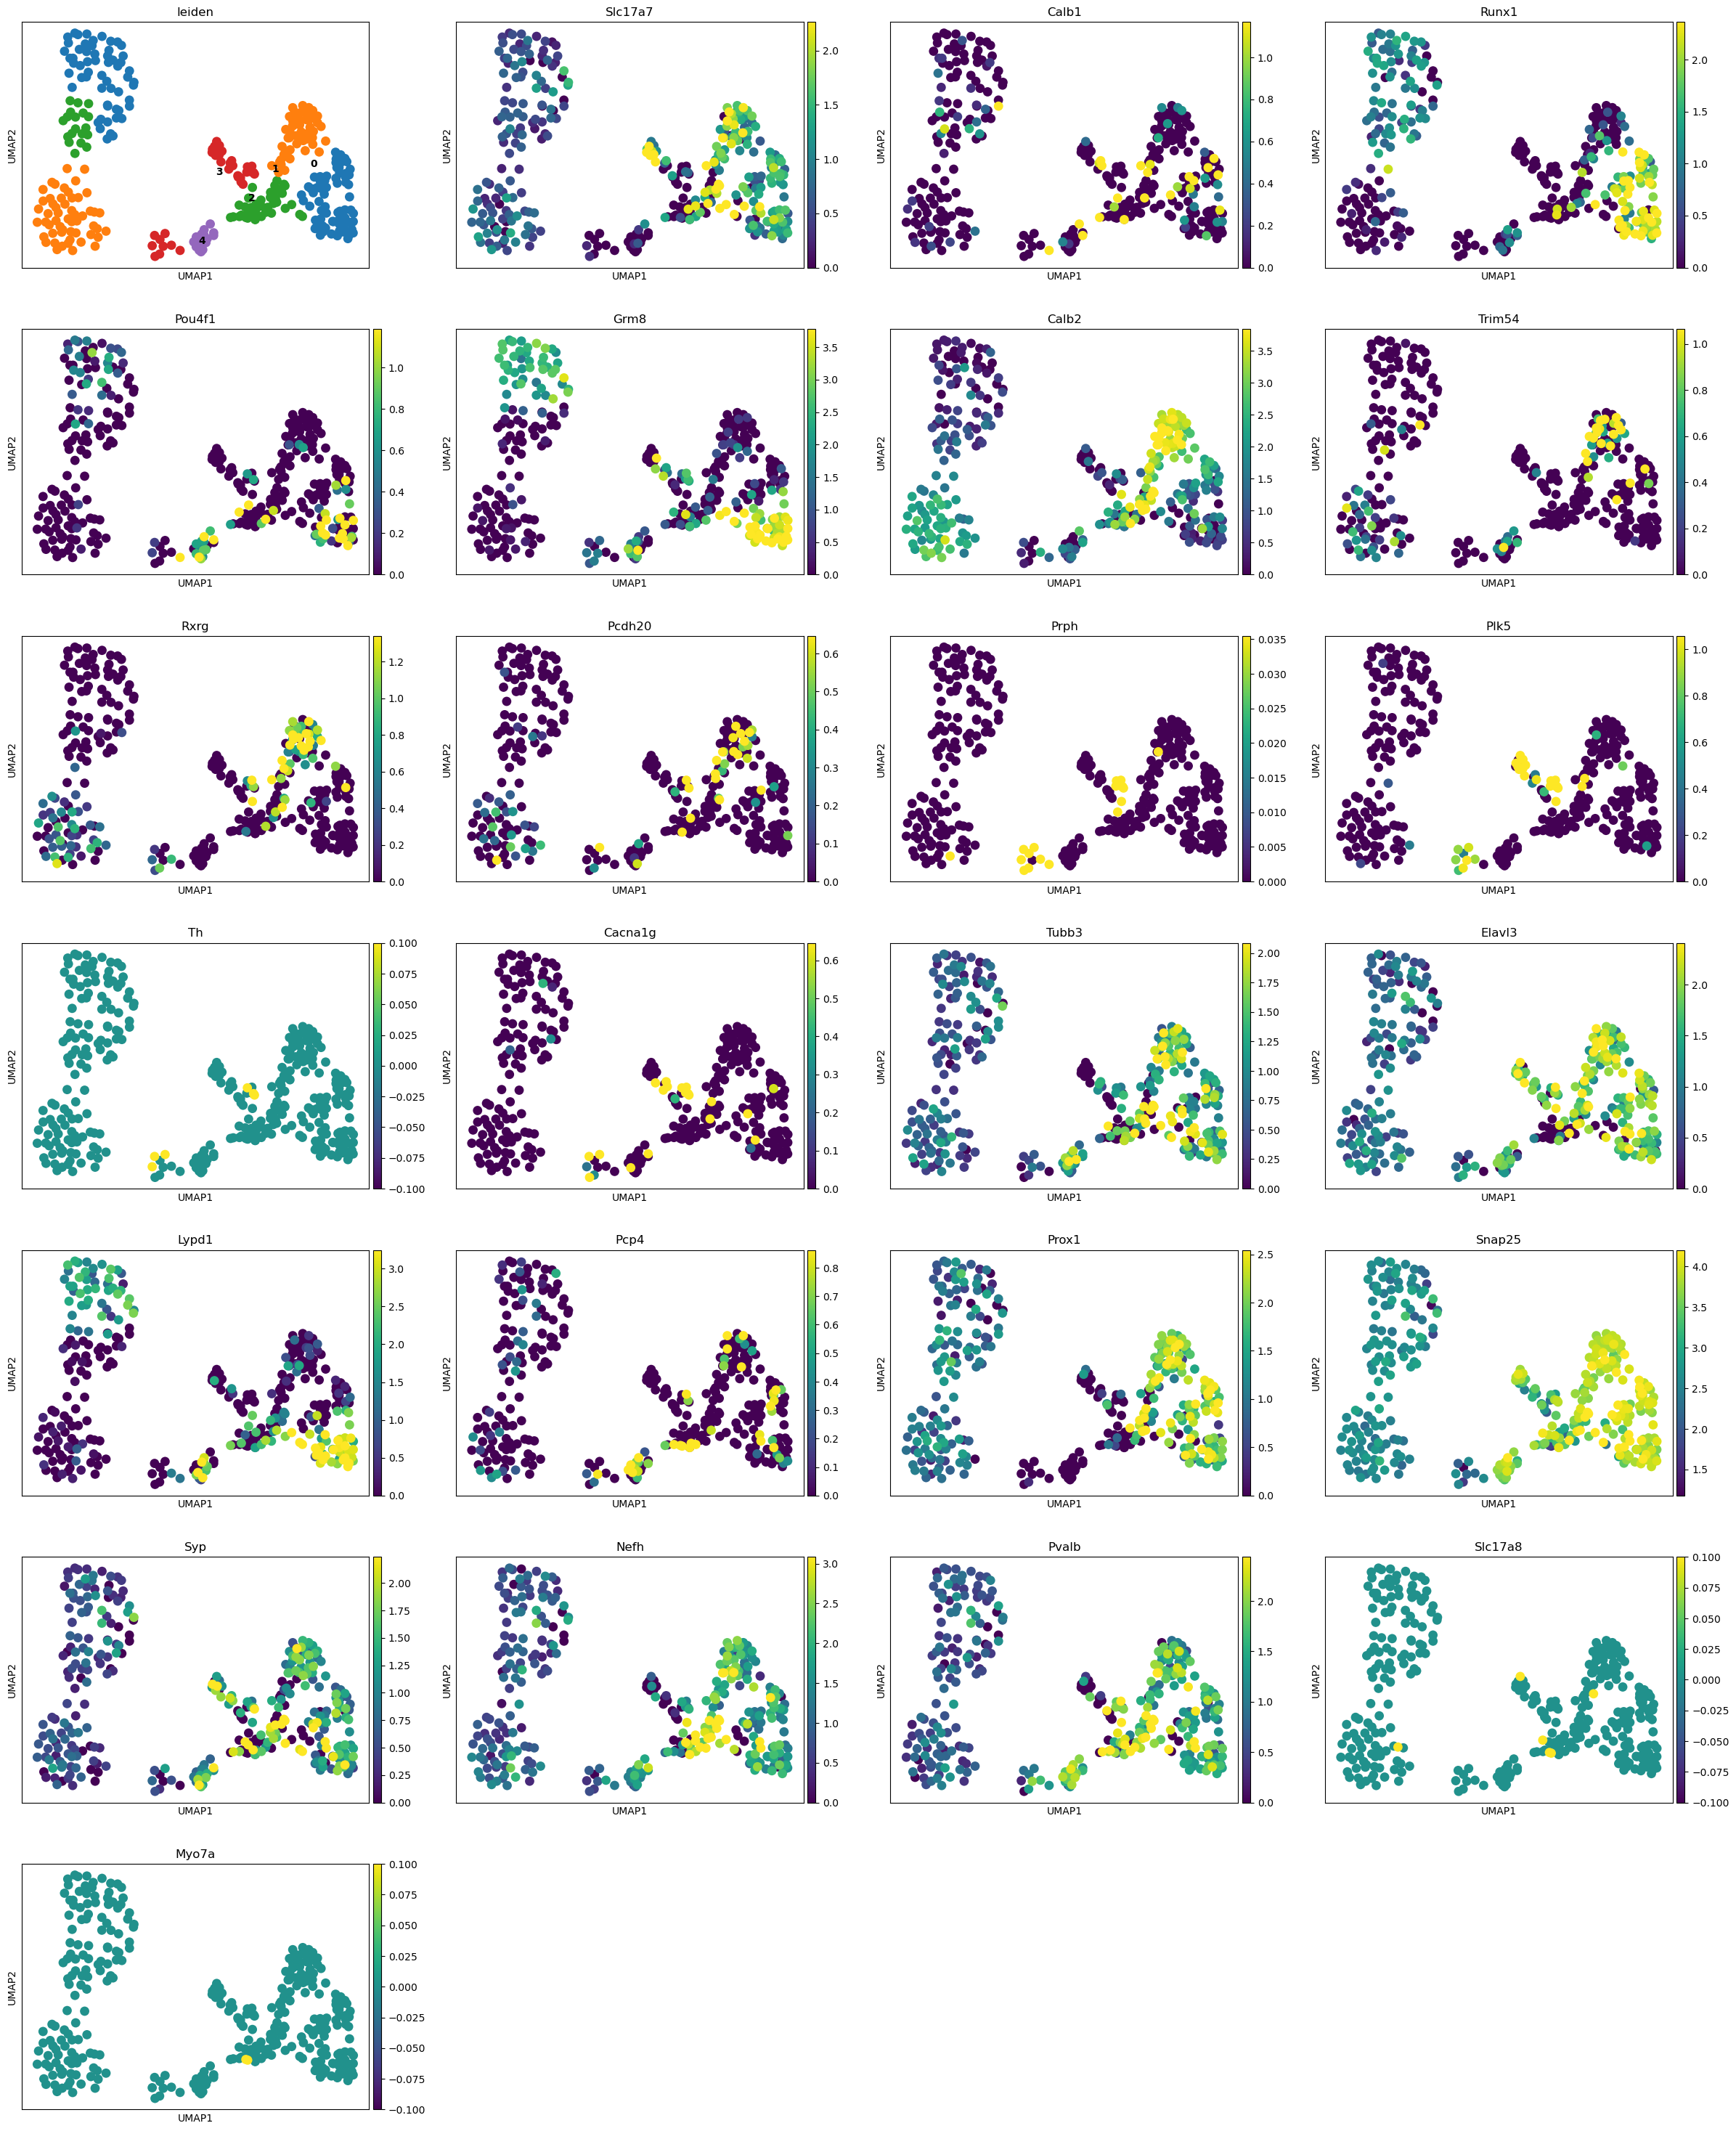

In [37]:
sc.pl.umap(new_neuron,color=neuron_cell_markers,vmax='p95',layer='log1p',legend_loc='on data')

[Executed on 2023-09-07 11:23:28.232283]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


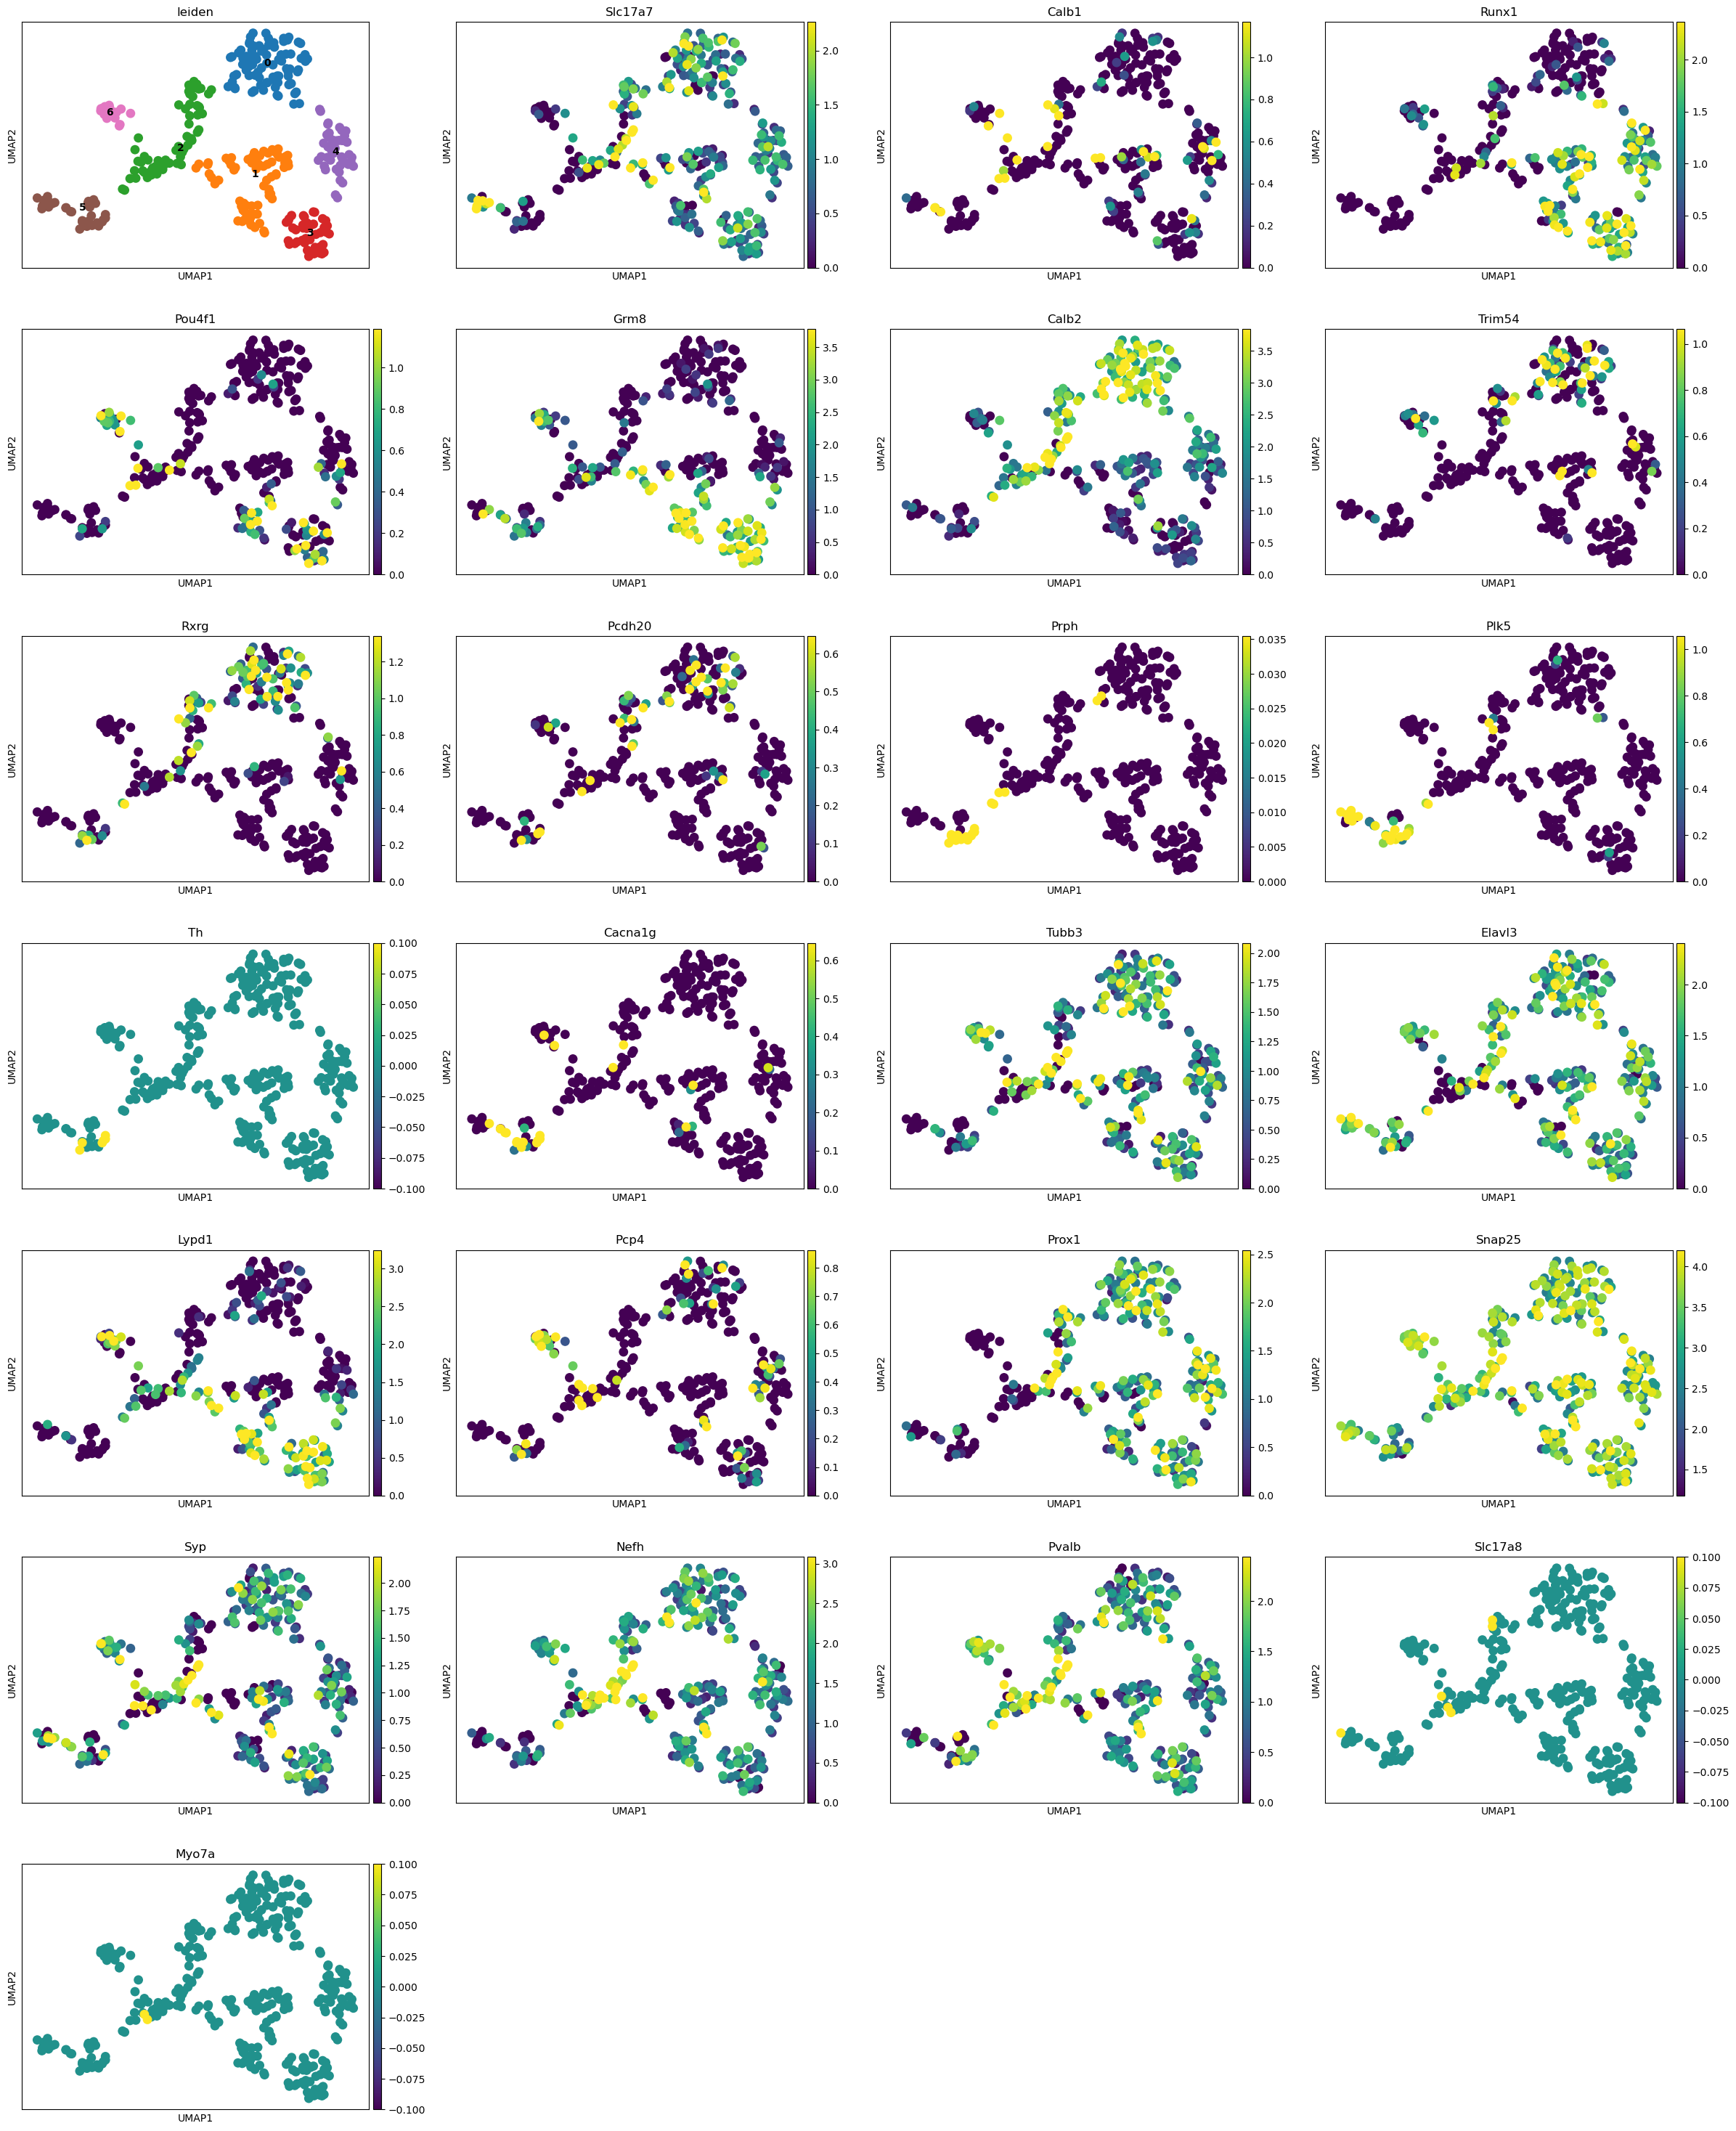

In [38]:
sc.pp.neighbors(new_neuron, n_neighbors=30, n_pcs=15)
sc.tl.leiden(new_neuron,resolution=0.3)
sc.tl.umap(new_neuron,min_dist=0.5)
sc.pl.umap(new_neuron,color=neuron_cell_markers,vmax='p95',layer='log1p',legend_loc='on data')

In [43]:
import scanpy as sc
modified=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/modified_intersection_16_plates.h5ad")
combined=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/combined.h5ad')
adata=sc.read_h5ad('/proj/sensoryaging/data/data/up_dated_data/SGNs/all_unknown_remove_PCP4.h5ad')


[Executed on 2023-09-07 16:38:21.152148]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


[Executed on 2023-09-07 16:36:58.793291]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


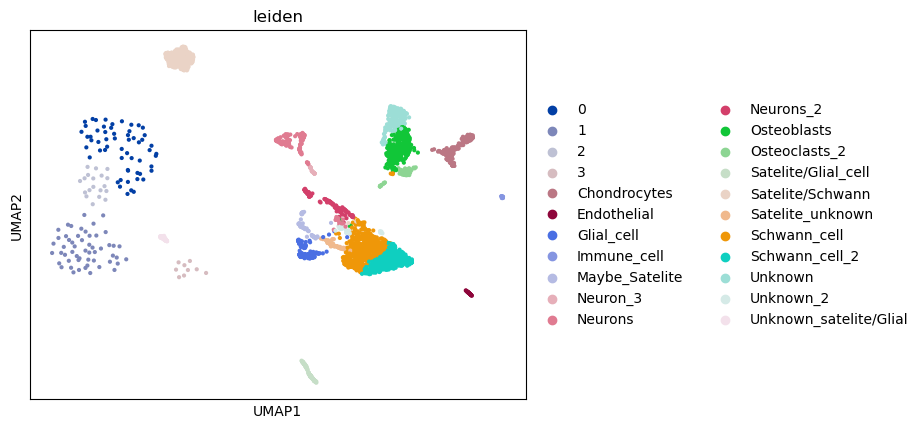

In [42]:
sc.pl.umap(combined,color='leiden')

[Executed on 2023-09-07 16:39:00.738265]
subset_leiden
NaN    2430
0       284
1       218
2        78
3        72
4        59
5        53
6        50
7        31
8        23
Name: count, dtype: int64


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


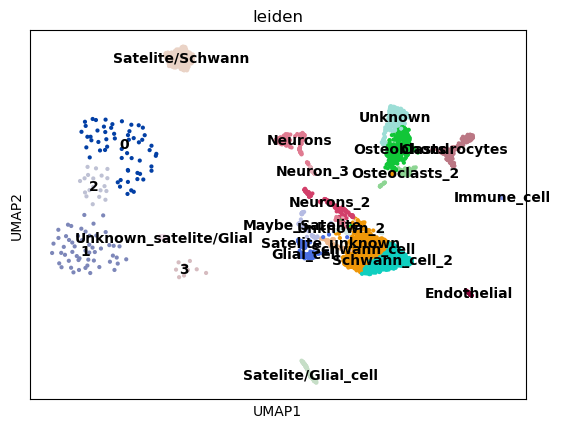

In [44]:
# Ensure that the index (unique identifier for cells) of adata is also present in modified
assert all(adata.obs.index.isin(combined.obs.index))

# Map the 'leiden' annotations of subset (adata) back to the main (modified)
combined.obs.loc[adata.obs.index, 'subset_leiden'] = adata.obs['leiden']

# Check the counts
print(combined.obs['subset_leiden'].value_counts(dropna=False))

sc.pl.umap(combined,color='leiden',legend_loc='on data',legend_fontsize=10)

[Executed on 2023-09-07 16:39:13.088791]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


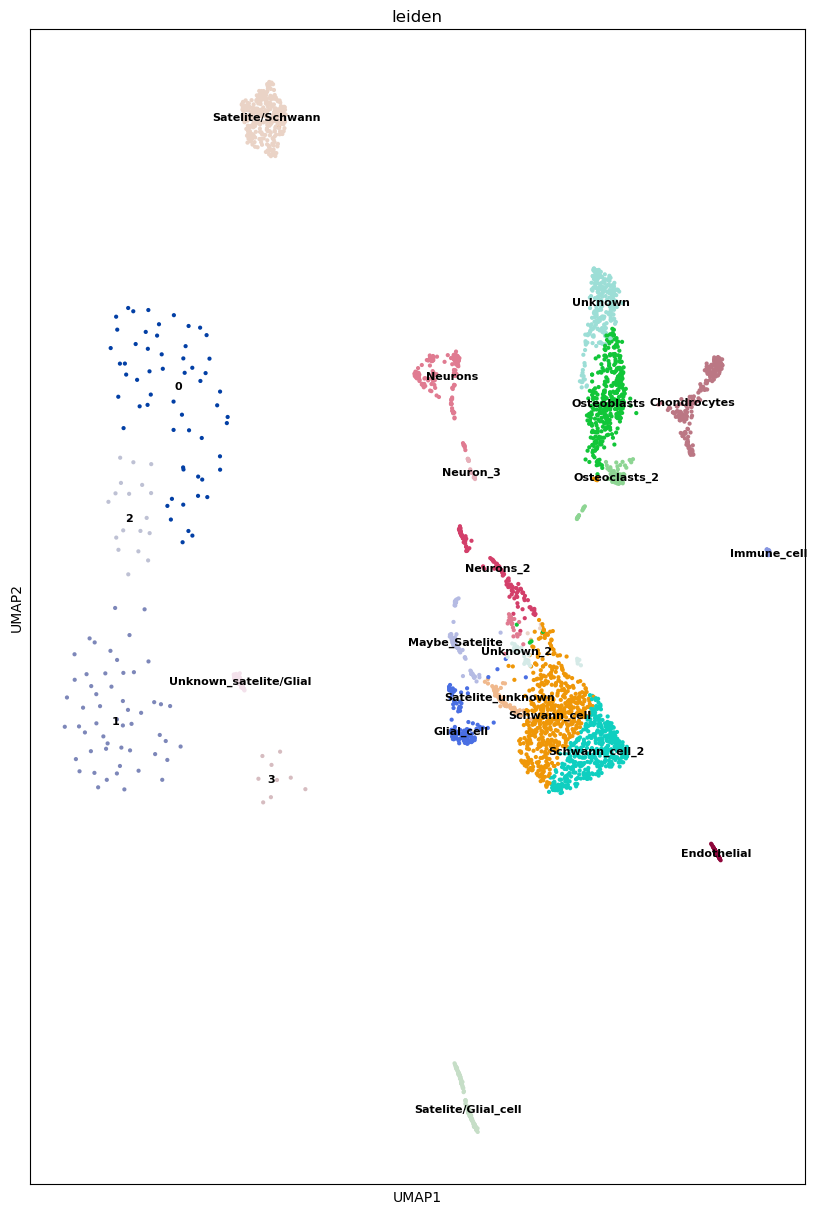

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 15))

sc.pl.umap(combined,legend_fontsize=8,color=['leiden'],legend_loc='on data',ax=ax)

In [46]:
# Create a dictionary for renaming
rename_dict = {
    'Satelite/Schwann': 'Schwann_cell_new',
    'Unknown': 'Satelite/Schwann_cell_new',
    'Satelite_unknown': 'glial/Schwann_new',
    'Unknown_satelite/Glial': 'satelite_new',
    'Unknown_2': 'glial/mix/satelite'
}

# Apply the renaming
combined.obs['leiden'] = combined.obs['leiden'].replace(rename_dict)

# Check the counts after renaming
print(combined.obs['leiden'].value_counts())


[Executed on 2023-09-07 16:39:27.703981]
leiden
Schwann_cell                 564
Schwann_cell_2               445
Osteoblasts                  370
Schwann_cell_new             306
Satelite/Schwann_cell_new    249
Chondrocytes                 204
Neurons                      183
Neurons_2                    130
Glial_cell                   129
Satelite/Glial_cell          122
glial/Schwann_new             93
Osteoclasts_2                 91
Maybe_Satelite                78
satelite_new                  63
0                             58
1                             54
glial/mix/satelite            41
Endothelial                   40
Neuron_3                      28
Immune_cell                   22
2                             19
3                              9
Name: count, dtype: int64


[Executed on 2023-09-07 16:39:35.710567]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


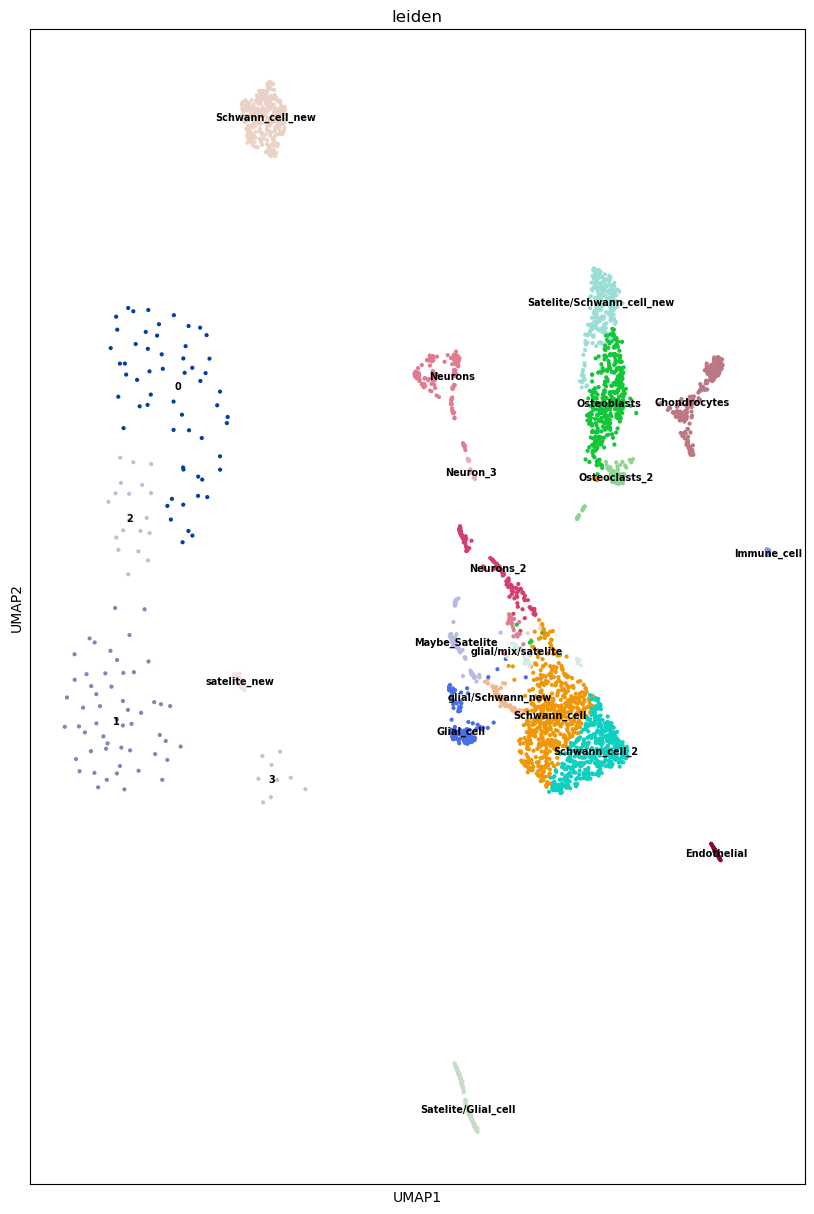

In [47]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 15))
sc.pl.umap(combined, color='leiden', legend_loc='on data', legend_fontsize=7, ax=ax,save='fulllabel.pdf')


In [48]:
combined.obs['leiden'].value_counts()

[Executed on 2023-09-07 16:42:32.546811]


leiden
Schwann_cell                 564
Schwann_cell_2               445
Osteoblasts                  370
Schwann_cell_new             306
Satelite/Schwann_cell_new    249
Chondrocytes                 204
Neurons                      183
Neurons_2                    130
Glial_cell                   129
Satelite/Glial_cell          122
glial/Schwann_new             93
Osteoclasts_2                 91
Maybe_Satelite                78
satelite_new                  63
0                             58
1                             54
glial/mix/satelite            41
Endothelial                   40
Neuron_3                      28
Immune_cell                   22
2                             19
3                              9
Name: count, dtype: int64

[Executed on 2023-09-07 16:46:09.201071]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


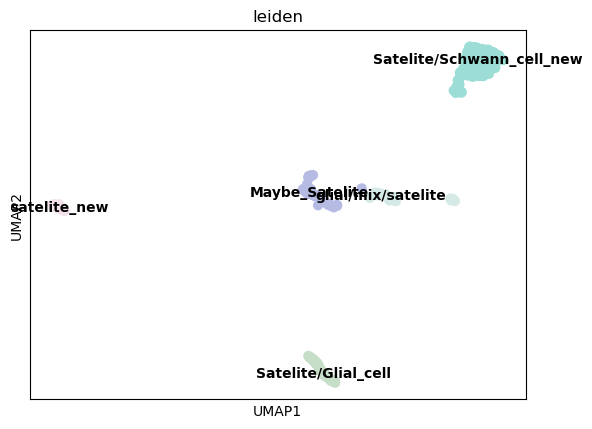

In [49]:
combined_satelite=combined[combined.obs['leiden'].isin(['Satelite/Schwann_cell_new','Satelite/Glial_cell','Maybe_Satelite','satelite_new','glial/mix/satelite'])]
sc.pl.umap(combined_satelite,color='leiden',legend_loc='on data')

In [50]:
combined_satelite

[Executed on 2023-09-07 16:49:15.524388]


View of AnnData object with n_obs × n_vars = 553 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_sub', 'subset_leiden'
    uns: 'leiden_colors'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal'
    layers: 'Scale', 'log1p', 'umi'

In [52]:
del combined_satelite.layers['Scale']
del combined_satelite.layers['log1p']
combined_satelite.X = combined_satelite.layers['umi'].copy()
sc.pp.normalize_total(combined_satelite, target_sum=None)
sc.pp.log1p(combined_satelite)
combined_satelite.layers['log1p'] = combined_satelite.X.copy()
sc.pp.scale(combined_satelite, max_value=10)
combined_satelite.layers['Scale'] = combined_satelite.X.copy()

[Executed on 2023-09-07 16:51:43.134823]


In [ ]:
sc.pp.neighbors(combined_satelite, n_neighbors=30, n_pcs=15)
sc.tl.leiden(combined_satelite,resolution=0.6)
sc.tl.umap(new_neuron,min_dist=0.5)
sc.pl.umap(combined_satelite,color=neuron_cell_markers,vmax='p95',layer='log1p',legend_loc='on data')

[Executed on 2023-09-07 16:52:08.954062]


/proj/sensoryaging/.conda/env/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


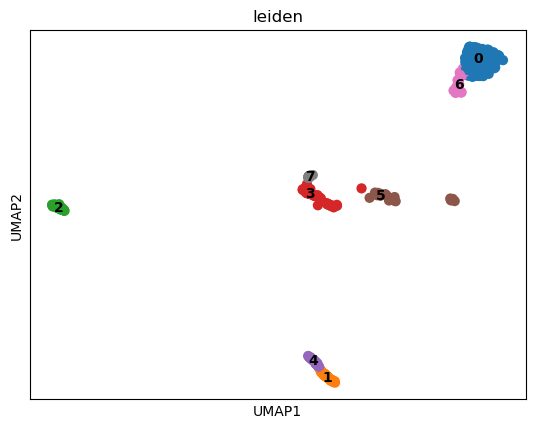

In [54]:
sc.pl.umap(combined_satelite,color='leiden',vmax='p95',layer='log1p',legend_loc='on data')

In [ ]:
'(PPAR-α)' in n

In [ ]:
Satelite_marker=['Bcan','Mlc1','Gja1','Ednrb','Slc1a3','Fabp7','Cdh19','Fbln2','Gfap','']